In [113]:
import itertools
import random
import sys

import gym
import matplotlib
import numpy as np
from lib import plotting
env = gym.envs.make('FrozenLake-v0')

In [114]:
Q = np.zeros([16, 4])

def setup_agent(state_size, action_size):
    
    gamma = 0.95                  # Discounting rate
    learning_rate = 0.8

    epsilon_start = 1.0
    epsilon_min = 0.01
    epsilon_decay = (epsilon_start - epsilon_min) / 50000
    curr_epsilon = epsilon_start

    def update_epsilon():
        nonlocal curr_epsilon
        if curr_epsilon > epsilon_min:
            curr_epsilon -= epsilon_decay
        
    def should_explore_fn():
        return np.random.rand() <= curr_epsilon
    
    def policy(state, explore_fn = should_explore_fn):
        if explore_fn():
            return random.randrange(action_size)
        return np.argmax(Q[state, :])

    def update_agent(state, action, reward, next_state, done):
        Q[state, action] = Q[state, action] + learning_rate * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        update_epsilon()
        return curr_epsilon

    return policy, update_agent

policy_fn, update_agent_fn = setup_agent(16,4)


In [115]:
def learning(env, policy_fn, update_agent_fn, num_episodes, render = False):
    rewards = []
    for i_episode in range(num_episodes):
        
        state = env.reset()
        reward_sum = 0
        for t in itertools.count():
            
            if render:
                env.render()
                
            action = policy_fn(state)
            
            next_state, reward, done, _ = env.step(action)
            curr_epsilon = update_agent_fn(state, action, reward, next_state, done)

            state = next_state
            reward_sum+=reward
            if done:
                if reward_sum !=0:
                    print('Epsilon:', curr_epsilon, ' Reward sum: ', reward_sum)
                rewards.append(reward_sum)
                break

    return rewards


In [116]:
r = learning(env,policy_fn, update_agent_fn,5000)

Epsilon: 0.9962775999999973  Reward sum:  1.0
Epsilon: 0.9696861999999782  Reward sum:  1.0
Epsilon: 0.956915199999969  Reward sum:  1.0
Epsilon: 0.9441243999999598  Reward sum:  1.0
Epsilon: 0.8745471999999097  Reward sum:  1.0
Epsilon: 0.8742105999999095  Reward sum:  1.0
Epsilon: 0.8695971999999061  Reward sum:  1.0
Epsilon: 0.8542719999998951  Reward sum:  1.0
Epsilon: 0.8535393999998946  Reward sum:  1.0
Epsilon: 0.8417781999998861  Reward sum:  1.0
Epsilon: 0.8411445999998857  Reward sum:  1.0
Epsilon: 0.8303931999998779  Reward sum:  1.0
Epsilon: 0.8209485999998711  Reward sum:  1.0
Epsilon: 0.8164143999998679  Reward sum:  1.0
Epsilon: 0.8161371999998677  Reward sum:  1.0
Epsilon: 0.813780999999866  Reward sum:  1.0
Epsilon: 0.8075439999998615  Reward sum:  1.0
Epsilon: 0.8069895999998611  Reward sum:  1.0
Epsilon: 0.80552439999986  Reward sum:  1.0
Epsilon: 0.7960005999998532  Reward sum:  1.0
Epsilon: 0.7954065999998527  Reward sum:  1.0
Epsilon: 0.7913871999998499  Reward su

Epsilon: 0.05896539999954423  Reward sum:  1.0
Epsilon: 0.05849019999954422  Reward sum:  1.0
Epsilon: 0.055718199999544166  Reward sum:  1.0
Epsilon: 0.05472819999954415  Reward sum:  1.0
Epsilon: 0.053084799999544116  Reward sum:  1.0
Epsilon: 0.0522927999995441  Reward sum:  1.0
Epsilon: 0.05169879999954409  Reward sum:  1.0
Epsilon: 0.05104539999954408  Reward sum:  1.0
Epsilon: 0.05003559999954406  Reward sum:  1.0
Epsilon: 0.04910499999954404  Reward sum:  1.0
Epsilon: 0.047263599999544006  Reward sum:  1.0
Epsilon: 0.04516479999954397  Reward sum:  1.0
Epsilon: 0.04472919999954396  Reward sum:  1.0
Epsilon: 0.04373919999954394  Reward sum:  1.0
Epsilon: 0.04330359999954393  Reward sum:  1.0
Epsilon: 0.04261059999954392  Reward sum:  1.0
Epsilon: 0.041818599999543904  Reward sum:  1.0
Epsilon: 0.041283999999543894  Reward sum:  1.0
Epsilon: 0.040353399999543876  Reward sum:  1.0
Epsilon: 0.03829419999954384  Reward sum:  1.0
Epsilon: 0.03585879999954379  Reward sum:  1.0
Epsilon:

In [117]:
env.reset()
learning(env,policy_fn, update_agent_fn,5,True)
env.close()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Epsilon: 0.009999999999543305  Reward sum:  1.0

SFF

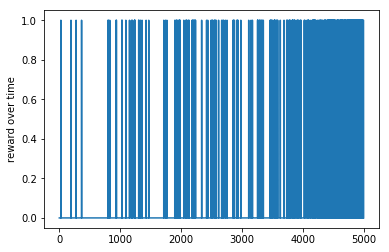

In [118]:
import matplotlib.pyplot as plt
plt.plot(np.array(r))
plt.ylabel('reward over time')
plt.show()